# Data Description

### Users Dataset

*   User Information such as user_id, gender, age, user occupation, user income range
*   https://docs.google.com/spreadsheets/d/1fS8qAeaDNxOi8Sx4Hs3qNzz0AaIw8h6vFDDDCMQzHHM/edit?usp=sharing

### Daily Balance Dataset

*   describe daily user balance
*   https://docs.google.com/spreadsheets/d/1Anho5wfblat5fWy6emz0Su5QfJrSaRdjjuh-BUanHO8/edit?usp=sharing










# Libraries

In [ ]:
import pandas as pd                     # to perform advanced data analysis, import data quickly
import numpy as np                      # to perform arge mahematical operations and statistical operation
from datetime import datetime           # to perform manipulating dates and times
import matplotlib.pyplot as plt         # to perform simple interactive visualization
import seaborn as sns                   # to perform visualization with many color palettes, beatifull style and many statistical plots
import plotly.express as px
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

### Data Information
Column Dictionary:


*  **user_id** = Client ID on the platform
*  **registration_import_datetime** = Registration time and date at UTC+7 timezone (WIB)
*  **user_gender** = User self-identified gender
*  **user_age** = User self-identified age
*  **user_occupation** = User self-identified job
*  **user_income_range** = User self-identified income range
*  **refferal_code_used** = user enter referral code during registration
*  **user_income_source** =  User self-declared source of income



### Data Information
Column Dictionary:
* **user_id** =	Client ID on the platform
* **date** = Date of the user balance
* **Saham_AUM** =	AUM of equity mutual fund held by client to date
* **Saham_invested_amount** =	The total price paid by client to buy equity mutual fund to date.
* **Saham_transaction_amount**	= Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
* **Pasar_Uang_AUM** =	AUM of money market mutual fund held by client to date
* **Pasar_Uang_invested_amount** =	The total price paid by client to buy money market mutual fund to date
* **Pasar_Uang_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
* **Pendapatan_Tetap_AUM** =	AUM of fixed income mutual fund held by client to date
* **Pendapatan_Tetap_invested_amount** =	The total price paid by client to buy fixed income mutual fund to date
* **Pendapatan_Tetap_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
* **Campuran_AUM** =	AUM of mixed mutual fund held by client to date
* **Campuran_invested_amount** =	The total price paid by client to buy mixed mutual fund to date
* **Campuran_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

In [ ]:
# users data
sheet_url = 'https://docs.google.com/spreadsheets/d/1fS8qAeaDNxOi8Sx4Hs3qNzz0AaIw8h6vFDDDCMQzHHM/edit#gid=396927856'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df_dt1 = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df_dt1.head() #only show first of 5 rows (not based on shorting etc)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
# daily balance data
sheet_url = 'https://docs.google.com/spreadsheets/d/1Anho5wfblat5fWy6emz0Su5QfJrSaRdjjuh-BUanHO8/edit#gid=338723989'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df_dt2 = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df_dt2.head() #only show first of 5 rows (not based on shorting etc)

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.00,10000000.00,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,0.00
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.00,10000000.00,0.00
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.00,10000000.00,0.00
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.00,10000000.00,0.00


# DATA TRANSFORM


#End of Period AUM and Balance

In [ ]:
df_eop = df_dt2[(df_dt2['date'] == '2021-08-31') | (df_dt2['date'] == '2021-09-30')]
df_eop

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,0.00
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9943587.00,10000000.00,0.00
24,50961,2021-08-31,716057.00,700000.00,NaN,100049.00,100000.00,NaN,200117.00,200000.00,NaN,NaN,NaN,NaN
46,50961,2021-09-30,2063909.00,2000000.00,300000.00,700603.00,700000.00,600000.00,1398998.00,1400000.00,1200000.00,NaN,NaN,NaN
52,53759,2021-08-31,70839.00,70000.00,0.00,10006.00,10000.00,0.00,20066.00,20000.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.00,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.00,40000.00,NaN,10001.00,10000.00,NaN,49869.00,50000.00,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.00,10000.00,NaN,NaN,NaN,NaN


drop the transaction column and rename the column

In [ ]:
df_eop.drop(['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'],axis=1,inplace=True)
df_eop.rename(columns = {'Saham_AUM':'Stocks_AUM_eop','Saham_invested_amount':'Stocks_invested_AUM_eop','Pasar_Uang_AUM':'MoneyMarket_AUM_eop','Pasar_Uang_invested_amount':'MoneyMarket_invested_amount_eop','Pendapatan_Tetap_AUM':'Bond_AUM_eop','Pendapatan_Tetap_invested_amount':'Bond_invested_amount_eop','Campuran_AUM':'Mixed_AUM_eop','Campuran_invested_amount':'Mixed_invested_amount_eop'},inplace=True)
df_eop

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,date,Stocks_AUM_eop,Stocks_invested_AUM_eop,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,Bond_AUM_eop,Bond_invested_amount_eop,Mixed_AUM_eop,Mixed_invested_amount_eop
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.00,10000000.00
24,50961,2021-08-31,716057.00,700000.00,100049.00,100000.00,200117.00,200000.00,NaN,NaN
46,50961,2021-09-30,2063909.00,2000000.00,700603.00,700000.00,1398998.00,1400000.00,NaN,NaN
52,53759,2021-08-31,70839.00,70000.00,10006.00,10000.00,20066.00,20000.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,10001.00,10000.00,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.00,40000.00,10001.00,10000.00,49869.00,50000.00,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,9987.00,10000.00,NaN,NaN


calculate profit

In [ ]:
df_eop = df_eop.assign(Stocks_profit = df_eop['Stocks_AUM_eop']-df_eop['Stocks_invested_AUM_eop'],
                        MoneyMarket_profit = df_eop['MoneyMarket_AUM_eop']-df_eop['MoneyMarket_invested_amount_eop'],
                        Bond_profit = df_eop['Bond_AUM_eop']-df_eop['Bond_invested_amount_eop'],
                        Mixed_profit = df_eop['Mixed_AUM_eop']-df_eop['Mixed_invested_amount_eop'],
                        )
df_eop

,user_id,date,Stocks_AUM_eop,Stocks_invested_AUM_eop,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,Bond_AUM_eop,Bond_invested_amount_eop,Mixed_AUM_eop,Mixed_invested_amount_eop,Stocks_profit,MoneyMarket_profit,Bond_profit,Mixed_profit
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,NaN,NaN,NaN,206945.00
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.00,10000000.00,NaN,NaN,NaN,-56413.00
24,50961,2021-08-31,716057.00,700000.00,100049.00,100000.00,200117.00,200000.00,NaN,NaN,16057.00,49.00,117.00,NaN
46,50961,2021-09-30,2063909.00,2000000.00,700603.00,700000.00,1398998.00,1400000.00,NaN,NaN,63909.00,603.00,-1002.00,NaN
52,53759,2021-08-31,70839.00,70000.00,10006.00,10000.00,20066.00,20000.00,NaN,NaN,839.00,6.00,66.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,10001.00,10000.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
158808,4165630,2021-09-30,41625.00,40000.00,10001.00,10000.00,49869.00,50000.00,NaN,NaN,1625.00,1.00,-131.00,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,9987.00,10000.00,NaN,NaN,NaN,NaN,-13.00,NaN


# Create Aggregate for Total Buy, Total Sell, Net and Frequency

we need month column which will be used for aggregation

In [ ]:
#change date data type to datetime
df_dt2['date'] = pd.to_datetime(df_dt2['date'])
#change date format
df_dt2['month'] = df_dt2['date'].dt.strftime('%Y-%m')
df_dt2

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,month
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.00,10000000.00,NaN,2021-08
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,0.00,2021-08
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.00,10000000.00,0.00,2021-09
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.00,10000000.00,0.00,2021-09
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.00,10000000.00,0.00,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.00,10000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09
158808,4165630,2021-09-30,41625.00,40000.00,NaN,10001.00,10000.00,NaN,49869.00,50000.00,NaN,NaN,NaN,NaN,2021-09
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.00,10000.00,NaN,NaN,NaN,NaN,2021-09


To calculate the total buy, add up all the positive value in the transaction value, and to calculate the total sell, add up all the negative calues in transaction column. For the Net, calculate the difference between total buy and total sell. for frequency flag with 1 if there any transaction

In [ ]:
df_agg_dt2 = df_dt2.assign(
    total_buy_stocks=np.where(
        df_dt2["Saham_transaction_amount"] > 0,
        df_dt2["Saham_transaction_amount"], 
        0,
    ),
    total_sell_stocks=np.where(
        df_dt2["Saham_transaction_amount"] < 0,
        df_dt2["Saham_transaction_amount"],
        0,
    ),
    transaction_freq_stocks=np.where(
        (df_dt2["Saham_transaction_amount"] > 0 ) | (df_dt2["Saham_transaction_amount"] < 0),
        1,
        0,
    ),
    total_buy_moneymarket=np.where(
        df_dt2["Pasar_Uang_transaction_amount"] > 0,
        df_dt2["Pasar_Uang_transaction_amount"], 
        0,
    ),
    total_sell_moneymarket=np.where(
        df_dt2["Pasar_Uang_transaction_amount"] < 0,
        df_dt2["Pasar_Uang_transaction_amount"],
        0,
    ),
    transaction_freq_moneymarket=np.where(
        (df_dt2["Pasar_Uang_transaction_amount"] > 0 ) | (df_dt2["Pasar_Uang_transaction_amount"] < 0),
        1,
        0,
    ),
    total_buy_bond=np.where(
        df_dt2["Pendapatan_Tetap_transaction_amount"] > 0,
        df_dt2["Pendapatan_Tetap_transaction_amount"], 
        0,
    ),
    total_sell_bond=np.where(
        df_dt2["Pendapatan_Tetap_transaction_amount"] < 0,
        df_dt2["Pendapatan_Tetap_transaction_amount"],
        0,
    ),
    transaction_freq_bond=np.where(
        (df_dt2["Pendapatan_Tetap_transaction_amount"] > 0 ) | (df_dt2["Pendapatan_Tetap_transaction_amount"] < 0),
        1,
        0,
    ),
    total_buy_mixed=np.where(
        df_dt2["Campuran_transaction_amount"] > 0,
        df_dt2["Campuran_transaction_amount"], 
        0,
    ),
    total_sell_mixed=np.where(
        df_dt2["Campuran_transaction_amount"] < 0,
        df_dt2["Campuran_transaction_amount"],
        0,
    ),
    transaction_freq_mixed=np.where(
        (df_dt2["Campuran_transaction_amount"] > 0 ) | (df_dt2["Campuran_transaction_amount"] < 0),
        1,
        0,
    ),   
)

df_agg_dt2 = (
    df_agg_dt2.groupby(['user_id','month'])
    .agg({
        "total_buy_stocks":"sum",
        "total_sell_stocks":"sum",
        "transaction_freq_stocks":"sum",
        "total_buy_moneymarket":"sum",
        "total_sell_moneymarket":"sum",
        "transaction_freq_moneymarket":"sum",
        "total_buy_bond":"sum",
        "total_sell_bond":"sum",
        "transaction_freq_bond":"sum",
        "total_buy_mixed":"sum",
        "total_sell_mixed":"sum",
        "transaction_freq_mixed":"sum",
        })
    .reset_index()
)

df_agg_dt2 = df_agg_dt2.assign(
    total_net_stocks = df_agg_dt2['total_buy_stocks']+df_agg_dt2['total_sell_stocks'],
    total_net_moneymarket = df_agg_dt2['total_buy_moneymarket']+df_agg_dt2['total_sell_moneymarket'],
    total_net_bond = df_agg_dt2['total_buy_bond']+df_agg_dt2['total_sell_bond'],
    total_net_mixed = df_agg_dt2['total_buy_mixed']+df_agg_dt2['total_sell_mixed'],
)

df_agg_dt2

,user_id,month,total_buy_stocks,total_sell_stocks,transaction_freq_stocks,total_buy_moneymarket,total_sell_moneymarket,transaction_freq_moneymarket,total_buy_bond,total_sell_bond,transaction_freq_bond,total_buy_mixed,total_sell_mixed,transaction_freq_mixed,total_net_stocks,total_net_moneymarket,total_net_bond,total_net_mixed
0,50701,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
1,50701,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
2,50961,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
3,50961,2021-09,1300000.00,0.00,2,600000.00,0.00,1,1200000.00,0.00,1,0.00,0.00,0,1300000.00,600000.00,1200000.00,0.00
4,53759,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
11348,4165132,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
11349,4165630,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
11350,4165704,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00


# Merge Transformed Data

took the month column on df_eop which will used to key column to merge

In [ ]:
#change date data type to datetime
df_eop['date'] = pd.to_datetime(df_eop['date'])
#change format to yyyy_mm
df_eop['month'] = df_eop['date'].dt.strftime('%Y-%m')
df_eop

,user_id,date,Stocks_AUM_eop,Stocks_invested_AUM_eop,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,Bond_AUM_eop,Bond_invested_amount_eop,Mixed_AUM_eop,Mixed_invested_amount_eop,Stocks_profit,MoneyMarket_profit,Bond_profit,Mixed_profit,month
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,NaN,NaN,NaN,206945.00,2021-08
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9943587.00,10000000.00,NaN,NaN,NaN,-56413.00,2021-09
24,50961,2021-08-31,716057.00,700000.00,100049.00,100000.00,200117.00,200000.00,NaN,NaN,16057.00,49.00,117.00,NaN,2021-08
46,50961,2021-09-30,2063909.00,2000000.00,700603.00,700000.00,1398998.00,1400000.00,NaN,NaN,63909.00,603.00,-1002.00,NaN,2021-09
52,53759,2021-08-31,70839.00,70000.00,10006.00,10000.00,20066.00,20000.00,NaN,NaN,839.00,6.00,66.00,NaN,2021-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,2021-09
158807,4165132,2021-09-30,NaN,NaN,10001.00,10000.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,2021-09
158808,4165630,2021-09-30,41625.00,40000.00,10001.00,10000.00,49869.00,50000.00,NaN,NaN,1625.00,1.00,-131.00,NaN,2021-09
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,9987.00,10000.00,NaN,NaN,NaN,NaN,-13.00,NaN,2021-09


merge the two dataframe that just created into new dataframe

In [ ]:
df_monthly_trx = pd.merge(df_eop, df_agg_dt2, on=['user_id','month'])
df_monthly_trx = df_monthly_trx[['user_id','month','Stocks_AUM_eop','Stocks_invested_AUM_eop','Stocks_profit','total_buy_stocks','total_sell_stocks','total_net_stocks','transaction_freq_stocks',
                                 'MoneyMarket_AUM_eop','MoneyMarket_invested_amount_eop','MoneyMarket_profit','total_buy_moneymarket','total_sell_moneymarket','total_net_moneymarket','transaction_freq_moneymarket',
                                 'Bond_AUM_eop','Bond_invested_amount_eop','Bond_profit','total_buy_bond','total_sell_bond','total_net_bond','transaction_freq_bond',
                                 'Mixed_AUM_eop','Mixed_invested_amount_eop','Mixed_profit','total_buy_mixed','total_sell_mixed','total_net_mixed','transaction_freq_mixed']]

df_monthly_trx                                 

,user_id,month,Stocks_AUM_eop,Stocks_invested_AUM_eop,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_freq_stocks,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,MoneyMarket_profit,total_buy_moneymarket,total_sell_moneymarket,total_net_moneymarket,transaction_freq_moneymarket,Bond_AUM_eop,Bond_invested_amount_eop,Bond_profit,total_buy_bond,total_sell_bond,total_net_bond,transaction_freq_bond,Mixed_AUM_eop,Mixed_invested_amount_eop,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_freq_mixed
0,50701,2021-08,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,10206945.00,10000000.00,206945.00,0.00,0.00,0.00,0
1,50701,2021-09,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,9943587.00,10000000.00,-56413.00,0.00,0.00,0.00,0
2,50961,2021-08,716057.00,700000.00,16057.00,0.00,0.00,0.00,0,100049.00,100000.00,49.00,0.00,0.00,0.00,0,200117.00,200000.00,117.00,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0
3,50961,2021-09,2063909.00,2000000.00,63909.00,1300000.00,0.00,1300000.00,2,700603.00,700000.00,603.00,600000.00,0.00,600000.00,1,1398998.00,1400000.00,-1002.00,1200000.00,0.00,1200000.00,1,NaN,NaN,NaN,0.00,0.00,0.00,0
4,53759,2021-08,70839.00,70000.00,839.00,0.00,0.00,0.00,0,10006.00,10000.00,6.00,0.00,0.00,0.00,0,20066.00,20000.00,66.00,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09,NaN,NaN,NaN,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0
11348,4165132,2021-09,NaN,NaN,NaN,0.00,0.00,0.00,0,10001.00,10000.00,1.00,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0
11349,4165630,2021-09,41625.00,40000.00,1625.00,0.00,0.00,0.00,0,10001.00,10000.00,1.00,0.00,0.00,0.00,0,49869.00,50000.00,-131.00,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0
11350,4165704,2021-09,NaN,NaN,NaN,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0,9987.00,10000.00,-13.00,0.00,0.00,0.00,0,NaN,NaN,NaN,0.00,0.00,0.00,0


#CLEANING DATA

##User Data

In [ ]:
df_user_clean = df_dt1.copy() #make a copy dataframe so the original dataframe didnt change if we manipulate data in the future
df_user_clean.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
df_user_clean.drop(['registration_import_datetime'],axis=1,inplace=True)
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  int64 
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   referral_code_used  5604 non-null   object
 6   user_income_source  14712 non-null  object
dtypes: int64(2), object(5)
memory usage: 804.7+ KB


Check typo or abnormal value in categorical column

In [ ]:
categorical_col = ['user_gender','user_occupation','user_income_range','referral_code_used','user_income_source']
for col in categorical_col :
  print('Value counts on', col, 'collumn:')
  print(df_user_clean[col].value_counts())
  print('\n')

Value counts on user_gender collumn:
Male      8977
Female    5735
Name: user_gender, dtype: int64


Value counts on user_occupation collumn:
Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64


Value counts on user_income_range collumn:
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64


Value counts on referral_code_used collumn:
used referral    5604
Name: referral_code_used, dtype: int64


Value counts on user_income_source collumn:
Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil I

all categorical values lok normal and ther are no typos, we can simplify the categories in the occupation and user income column

In [ ]:
df_user_clean.loc[df_user_clean['user_occupation'] == 'PNS', 'user_occupation'] = 'others'
df_user_clean.loc[df_user_clean['user_occupation'] == 'Guru', 'user_occupation'] = 'others'
df_user_clean.loc[df_user_clean['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'others'
df_user_clean.loc[df_user_clean['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'others'
df_user_clean.loc[df_user_clean['user_occupation'] == 'others', 'user_occupation'] = 'Others'

df_user_clean.loc[df_user_clean['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df_user_clean.loc[df_user_clean['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df_user_clean.loc[df_user_clean['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

categorical_col = ['user_occupation','user_income_range']

for col in categorical_col :
  print('Value counts on', col, 'collumn:')
  print(df_user_clean[col].value_counts())
  print('\n')

Value counts on user_occupation collumn:
Pelajar      7887
Swasta       3263
Others       2030
IRT           934
Pengusaha     598
Name: user_occupation, dtype: int64


Value counts on user_income_range collumn:
< 10 Juta                  6275
Rp 10 Juta - 50 Juta       4816
> Rp 50 Juta - 100 Juta    2390
> Rp 100 Juta              1231
Name: user_income_range, dtype: int64




## Daily user Balance data

In [ ]:
df_bal_clean = df_dt2.copy() #make a copy dataframe so the original dataframe didnt change if we manipulate data in the future
df_bal_clean.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

for daily user data, we want to see the daily trx made by user, so we drop AUM and balance, because both data are available un the monthly data

In [ ]:
df_bal_clean.drop(['Saham_AUM','Saham_invested_amount',
                   'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
                   'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount',
                   'Campuran_AUM','Campuran_invested_amount'
                   ],axis=1,inplace=True)
df_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_transaction_amount             100839 non-null  float64       
 3   Pasar_Uang_transaction_amount        124273 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  100497 non-null  float64       
 5   Campuran_transaction_amount          5117 non-null    float64       
 6   month                                158811 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 8.5+ MB


##Monthly Transaction Data

In [ ]:
df_monthly_trx_clean = df_monthly_trx.copy()
df_monthly_trx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          11352 non-null  int64  
 1   month                            11352 non-null  object 
 2   Stocks_AUM_eop                   7544 non-null   float64
 3   Stocks_invested_AUM_eop          7544 non-null   float64
 4   Stocks_profit                    7544 non-null   float64
 5   total_buy_stocks                 11352 non-null  float64
 6   total_sell_stocks                11352 non-null  float64
 7   total_net_stocks                 11352 non-null  float64
 8   transaction_freq_stocks          11352 non-null  int64  
 9   MoneyMarket_AUM_eop              9367 non-null   float64
 10  MoneyMarket_invested_amount_eop  9367 non-null   float64
 11  MoneyMarket_profit               9367 non-null   float64
 12  total_buy_moneymar

#Handling Missing Data

###User Data

In [ ]:
df_user_clean.isna().sum()

user_id                  0
user_gender              0
user_age                 0
user_occupation          0
user_income_range        0
referral_code_used    9108
user_income_source       0
dtype: int64

In [ ]:
#change empty values in the referral_code_used, fill with not used referral
df_user_clean['referral_code_used']= df_user_clean['referral_code_used'].fillna('not used referral')
df_user_clean['referral_code_used'].value_counts()

not used referral    9108
used referral        5604
Name: referral_code_used, dtype: int64

In [ ]:
df_user_clean.isna().sum()

user_id               0
user_gender           0
user_age              0
user_occupation       0
user_income_range     0
referral_code_used    0
user_income_source    0
dtype: int64

there are no more missing values

### Daily User Balance Data

In [ ]:
df_bal_clean.isna().sum()

user_id                                     0
date                                        0
Saham_transaction_amount                57972
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_transaction_amount     58314
Campuran_transaction_amount            153694
month                                       0
dtype: int64

there a lot of missing value because all users not have aall four types mutual funds, we will fillit with 0 to facilitate further analysis.

In [ ]:
df_bal_clean = df_bal_clean.fillna(0)
df_bal_clean.isna().sum()

user_id                                0
date                                   0
Saham_transaction_amount               0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_transaction_amount    0
Campuran_transaction_amount            0
month                                  0
dtype: int64

### Monthly Transaction Data

In [ ]:
df_monthly_trx_clean.isna().sum()

user_id                                0
month                                  0
Stocks_AUM_eop                      3808
Stocks_invested_AUM_eop             3808
Stocks_profit                       3808
total_buy_stocks                       0
total_sell_stocks                      0
total_net_stocks                       0
transaction_freq_stocks                0
MoneyMarket_AUM_eop                 1985
MoneyMarket_invested_amount_eop     1985
MoneyMarket_profit                  1985
total_buy_moneymarket                  0
total_sell_moneymarket                 0
total_net_moneymarket                  0
transaction_freq_moneymarket           0
Bond_AUM_eop                        3844
Bond_invested_amount_eop            3844
Bond_profit                         3844
total_buy_bond                         0
total_sell_bond                        0
total_net_bond                         0
transaction_freq_bond                  0
Mixed_AUM_eop                      11004
Mixed_invested_a

just like in the daily transaction data, we fill the value with 0

In [ ]:
df_monthly_trx_clean = df_monthly_trx_clean.fillna(0)
df_monthly_trx_clean.isna().sum()

user_id                            0
month                              0
Stocks_AUM_eop                     0
Stocks_invested_AUM_eop            0
Stocks_profit                      0
total_buy_stocks                   0
total_sell_stocks                  0
total_net_stocks                   0
transaction_freq_stocks            0
MoneyMarket_AUM_eop                0
MoneyMarket_invested_amount_eop    0
MoneyMarket_profit                 0
total_buy_moneymarket              0
total_sell_moneymarket             0
total_net_moneymarket              0
transaction_freq_moneymarket       0
Bond_AUM_eop                       0
Bond_invested_amount_eop           0
Bond_profit                        0
total_buy_bond                     0
total_sell_bond                    0
total_net_bond                     0
transaction_freq_bond              0
Mixed_AUM_eop                      0
Mixed_invested_amount_eop          0
Mixed_profit                       0
total_buy_mixed                    0
t

#Removing Duplicates


In [ ]:
df_user_clean.duplicated('user_id').sum()

0

In [ ]:
df_bal_clean.duplicated().sum()

0

In [ ]:
df_monthly_trx_clean.duplicated(['user_id','month']).sum()

0

#OUTLIERS

###User Data

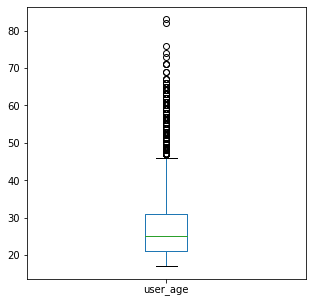

In [ ]:
#do an initital screening of outliers using boxplots
df_user_clean.boxplot(column=['user_age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

there are many outliers in the user age data, use the IQR formula to calculat lower and upper than delete the data outsed fence

In [ ]:
Q1 = df_user_clean['user_age'].quantile(0.25)
Q3 = df_user_clean['user_age'].quantile(0.75)

IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower fence:',lower_fence)
print('Upper fence:',upper_fence)

Q1: 21.0
Q3: 31.0
IQR: 10.0
Lower fence: 6.0
Upper fence: 46.0


In [ ]:
df_user_full = len(df_user_clean)
outliers_age = len(df_user_clean[(df_user_clean['user_age']<lower_fence) | (df_user_clean['user_age']>upper_fence)])

print('data length before remove outliers:',df_user_full)
print('total outliers:', outliers_age)
print('percentage:', round(outliers_age/df_user_full*100,2),'%')

data length before remove outliers: 14712
total outliers: 652
percentage: 4.43 %


the outliers is 4.43% from the data, since it small, we can delete them

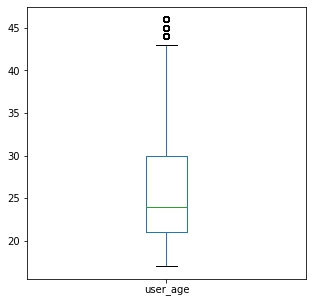

In [ ]:
df_user_clean = df_user_clean[(df_user_clean['user_age']>=lower_fence) & (df_user_clean['user_age']<=upper_fence)]
df_user_clean.boxplot(column=['user_age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

outliers have been greatly reduced after do second screening using boxplot

In [ ]:
print('data before remove outliers:', df_user_full)
print('data after remove outlier:', len(df_user_clean))

data before remove outliers: 14712
data after remove outlier: 14060


### Daily user Balance data

for daily data transaction, we need to chec outliers in all transaction columns and exclude values that are 0 so they dont interfere the IQR calculation

In [ ]:
# Stock Trx IQR
df_saham = df_bal_clean[df_bal_clean['Saham_transaction_amount'] != 0]

Q1 = df_saham['Saham_transaction_amount'].quantile(0.25)
Q3 = df_saham['Saham_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lf_saham = Q1 - 1.5 * IQR
uf_saham = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('lower:',lf_saham)
print('upper:',uf_saham)

Q1: -40000.0
Q3: 150110.0
lower: -325165.0
upper: 435275.0


In [ ]:
# Money Market Trx IQR 
df_pu = df_bal_clean[df_bal_clean['Pasar_Uang_transaction_amount'] != 0]

Q1 = df_pu['Pasar_Uang_transaction_amount'].quantile(0.25)
Q3 = df_pu['Pasar_Uang_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lf_pu = Q1 - 1.5 * IQR
uf_pu = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('lower:',lf_pu)
print('upper:',uf_pu)

Q1: -10000.0
Q3: 100000.0
lower: -175000.0
upper: 265000.0


In [ ]:
# Bond Trx IQR
df_pt = df_bal_clean[df_bal_clean['Pendapatan_Tetap_transaction_amount'] != 0]

Q1 = df_pt['Pendapatan_Tetap_transaction_amount'].quantile(0.25)
Q3 = df_pt['Pendapatan_Tetap_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lf_pt = Q1 - 1.5 * IQR
uf_pt = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('lower:',lf_pt)
print('upper:',uf_pt)

Q1: -20000.0
Q3: 170000.0
lower: -305000.0
upper: 455000.0


In [ ]:
#Mixed Trx IQR 
df_campuran = df_bal_clean[df_bal_clean['Campuran_transaction_amount'] != 0]

Q1 = df_campuran['Campuran_transaction_amount'].quantile(0.25)
Q3 = df_campuran['Campuran_transaction_amount'].quantile(0.75)

IQR = Q3 - Q1
lf_campuran = Q1 - 1.5 * IQR
uf_campuran = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('lower:',lf_campuran)
print('upper:',uf_campuran)

Q1: -100000.0
Q3: 2000000.0
lower: -3250000.0
upper: 5150000.0


after finding the IQR we keep user id that have trx data that are outliers

In [ ]:
trx_outliers = df_bal_clean [
    ~df_bal_clean['Saham_transaction_amount'].between(lf_saham, uf_saham) |
    ~df_bal_clean['Pasar_Uang_transaction_amount'].between(lf_pu, uf_pu) |
    ~df_bal_clean['Pendapatan_Tetap_transaction_amount'].between(lf_pt, uf_pt) |
    ~df_bal_clean['Campuran_transaction_amount'].between(lf_campuran, uf_campuran)]
trx_outliers    

,user_id,date,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
25,50961,2021-09-01,1000000.00,0.00,0.00,0.00,2021-09
46,50961,2021-09-30,300000.00,600000.00,1200000.00,0.00,2021-09
99,54759,2021-09-30,0.00,2000000.00,0.00,0.00,2021-09
166,67251,2021-09-20,530000.00,100000.00,370000.00,0.00,2021-09
196,71229,2021-08-20,0.00,0.00,0.00,-4300000.00,2021-08
...,...,...,...,...,...,...,...
158161,4132281,2021-09-30,450000.00,140000.00,210000.00,0.00,2021-09
158164,4132347,2021-09-30,0.00,0.00,500000.00,0.00,2021-09
158178,4132672,2021-09-30,-100000.00,1000000.00,0.00,0.00,2021-09
158220,4134266,2021-09-30,0.00,1190000.00,0.00,0.00,2021-09


In [ ]:
user_outliers = trx_outliers['user_id'].drop_duplicates().values.tolist()
len(user_outliers)

1316

there are 1316 users whose trx values ar counted as ouliers, we can eliminate all the trx of these users.

In [ ]:
df_bal_clean = df_bal_clean [~df_bal_clean['user_id'].isin(user_outliers)]
df_bal_clean

,user_id,date,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
0,50701,2021-08-30,0.00,0.00,0.00,0.00,2021-08
1,50701,2021-08-31,0.00,0.00,0.00,0.00,2021-08
2,50701,2021-09-01,0.00,0.00,0.00,0.00,2021-09
3,50701,2021-09-02,0.00,0.00,0.00,0.00,2021-09
4,50701,2021-09-03,0.00,0.00,0.00,0.00,2021-09
...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.00,0.00,0.00,0.00,2021-09
158807,4165132,2021-09-30,0.00,0.00,0.00,0.00,2021-09
158808,4165630,2021-09-30,0.00,0.00,0.00,0.00,2021-09
158809,4165704,2021-09-30,0.00,0.00,0.00,0.00,2021-09


there are 126.452 total data after removing outliers 

### Monthly Transaction Data

we do the same with our monthly data from the user_id list that we created before

In [ ]:
df_monthly_trx_clean = df_monthly_trx_clean[~df_monthly_trx_clean['user_id'].isin(user_outliers)]
df_monthly_trx_clean

,user_id,month,Stocks_AUM_eop,Stocks_invested_AUM_eop,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_freq_stocks,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,MoneyMarket_profit,total_buy_moneymarket,total_sell_moneymarket,total_net_moneymarket,transaction_freq_moneymarket,Bond_AUM_eop,Bond_invested_amount_eop,Bond_profit,total_buy_bond,total_sell_bond,total_net_bond,transaction_freq_bond,Mixed_AUM_eop,Mixed_invested_amount_eop,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_freq_mixed
0,50701,2021-08,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,10206945.00,10000000.00,206945.00,0.00,0.00,0.00,0
1,50701,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,9943587.00,10000000.00,-56413.00,0.00,0.00,0.00,0
4,53759,2021-08,70839.00,70000.00,839.00,0.00,0.00,0.00,0,10006.00,10000.00,6.00,0.00,0.00,0.00,0,20066.00,20000.00,66.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
5,53759,2021-09,73179.00,70000.00,3179.00,0.00,0.00,0.00,0,10027.00,10000.00,27.00,0.00,0.00,0.00,0,20109.00,20000.00,109.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8,61414,2021-08,0.00,0.00,0.00,0.00,-10000.00,-10000.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,4165020,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
11348,4165132,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,10001.00,10000.00,1.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
11349,4165630,2021-09,41625.00,40000.00,1625.00,0.00,0.00,0.00,0,10001.00,10000.00,1.00,0.00,0.00,0.00,0,49869.00,50000.00,-131.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
11350,4165704,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,9987.00,10000.00,-13.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0


there are 9297 monthly trx data after removing outliers 

#Convert Data Type

###User Data

In [ ]:
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 495 to 14554
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14060 non-null  int64 
 1   user_gender         14060 non-null  object
 2   user_age            14060 non-null  int64 
 3   user_occupation     14060 non-null  object
 4   user_income_range   14060 non-null  object
 5   referral_code_used  14060 non-null  object
 6   user_income_source  14060 non-null  object
dtypes: int64(2), object(5)
memory usage: 878.8+ KB


change user_id to string

In [ ]:
df_user_clean['user_id'] = df_user_clean['user_id'].astype(str)
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14060 entries, 495 to 14554
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14060 non-null  object
 1   user_gender         14060 non-null  object
 2   user_age            14060 non-null  int64 
 3   user_occupation     14060 non-null  object
 4   user_income_range   14060 non-null  object
 5   referral_code_used  14060 non-null  object
 6   user_income_source  14060 non-null  object
dtypes: int64(1), object(6)
memory usage: 878.8+ KB


###Daily User Balance Data

In [ ]:
df_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  int64         
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_transaction_amount             126452 non-null  float64       
 3   Pasar_Uang_transaction_amount        126452 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  126452 non-null  float64       
 5   Campuran_transaction_amount          126452 non-null  float64       
 6   month                                126452 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 7.7+ MB


change user_id to string 


In [ ]:
df_bal_clean['user_id'] = df_bal_clean['user_id'].astype(str)
df_bal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126452 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              126452 non-null  object        
 1   date                                 126452 non-null  datetime64[ns]
 2   Saham_transaction_amount             126452 non-null  float64       
 3   Pasar_Uang_transaction_amount        126452 non-null  float64       
 4   Pendapatan_Tetap_transaction_amount  126452 non-null  float64       
 5   Campuran_transaction_amount          126452 non-null  float64       
 6   month                                126452 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.7+ MB


###Monthly Transaction Data

In [ ]:
df_monthly_trx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          9297 non-null   int64  
 1   month                            9297 non-null   object 
 2   Stocks_AUM_eop                   9297 non-null   float64
 3   Stocks_invested_AUM_eop          9297 non-null   float64
 4   Stocks_profit                    9297 non-null   float64
 5   total_buy_stocks                 9297 non-null   float64
 6   total_sell_stocks                9297 non-null   float64
 7   total_net_stocks                 9297 non-null   float64
 8   transaction_freq_stocks          9297 non-null   int64  
 9   MoneyMarket_AUM_eop              9297 non-null   float64
 10  MoneyMarket_invested_amount_eop  9297 non-null   float64
 11  MoneyMarket_profit               9297 non-null   float64
 12  total_buy_moneymark

change user_id to string

In [ ]:
df_monthly_trx_clean['user_id'] = df_monthly_trx_clean['user_id'].astype(str)
df_monthly_trx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 11351
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          9297 non-null   object 
 1   month                            9297 non-null   object 
 2   Stocks_AUM_eop                   9297 non-null   float64
 3   Stocks_invested_AUM_eop          9297 non-null   float64
 4   Stocks_profit                    9297 non-null   float64
 5   total_buy_stocks                 9297 non-null   float64
 6   total_sell_stocks                9297 non-null   float64
 7   total_net_stocks                 9297 non-null   float64
 8   transaction_freq_stocks          9297 non-null   int64  
 9   MoneyMarket_AUM_eop              9297 non-null   float64
 10  MoneyMarket_invested_amount_eop  9297 non-null   float64
 11  MoneyMarket_profit               9297 non-null   float64
 12  total_buy_moneymark

#Combine and Merge Datasets

we merge our daily trx with user data so we can get all information in one whole table

In [ ]:
df_md = pd.merge(df_user_clean, df_bal_clean,on=['user_id'])
df_md

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-08,0.00,0.00,0.00,0.00,2021-09
1,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-09,0.00,0.00,0.00,0.00,2021-09
2,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-10,0.00,0.00,0.00,0.00,2021-09
3,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-13,0.00,0.00,0.00,0.00,2021-09
4,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-14,0.00,0.00,0.00,0.00,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121655,3802513,Female,46,IRT,< 10 Juta,not used referral,Gaji,2021-09-24,0.00,0.00,0.00,0.00,2021-09
121656,3802513,Female,46,IRT,< 10 Juta,not used referral,Gaji,2021-09-27,0.00,0.00,0.00,0.00,2021-09
121657,3802513,Female,46,IRT,< 10 Juta,not used referral,Gaji,2021-09-28,0.00,0.00,0.00,0.00,2021-09
121658,3802513,Female,46,IRT,< 10 Juta,not used referral,Gaji,2021-09-29,0.00,0.00,0.00,0.00,2021-09


do the same with monthly trx data

In [ ]:
df_mm = pd.merge(df_user_clean, df_monthly_trx_clean, on=['user_id'])
df_mm

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,month,Stocks_AUM_eop,Stocks_invested_AUM_eop,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_freq_stocks,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,MoneyMarket_profit,total_buy_moneymarket,total_sell_moneymarket,total_net_moneymarket,transaction_freq_moneymarket,Bond_AUM_eop,Bond_invested_amount_eop,Bond_profit,total_buy_bond,total_sell_bond,total_net_bond,transaction_freq_bond,Mixed_AUM_eop,Mixed_invested_amount_eop,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_freq_mixed
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09,194956.00,190000.00,4956.00,0.00,0.00,0.00,0,40063.00,40000.00,63.00,0.00,0.00,0.00,0,262853.00,270000.00,-7147.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
1,2182692,Male,17,Pelajar,< 10 Juta,used referral,Undian,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,140294.00,140000.00,294.00,0.00,0.00,0.00,0,74767.00,75000.00,-233.00,25000.00,0.00,25000.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0
2,3426536,Female,17,Pelajar,< 10 Juta,not used referral,Undian,2021-09,51857.00,50000.00,1857.00,0.00,0.00,0.00,0,10002.00,10000.00,2.00,0.00,0.00,0.00,0,39955.00,40000.00,-45.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,605271.00,604590.00,681.00,504590.00,0.00,504590.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0
4,3750521,Male,17,Pelajar,< 10 Juta,not used referral,Hasil Investasi,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,10008.00,10000.00,8.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,3736233,Male,46,Swasta,< 10 Juta,not used referral,Gaji,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,201147.00,200000.00,1147.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8934,2478889,Female,46,Swasta,< 10 Juta,not used referral,Gaji,2021-08,30486.00,30000.00,486.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,70488.00,70000.00,488.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8935,2478889,Female,46,Swasta,< 10 Juta,not used referral,Gaji,2021-09,31583.00,30000.00,1583.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,70175.00,70000.00,175.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8936,3802513,Female,46,IRT,< 10 Juta,not used referral,Gaji,2021-08,0.00,0.00,0.00,0.00,0.00,0.00,0,10012.00,10000.00,12.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0


Now we have 2 complete data with their respective functions.

*   df_md = used to analyze daily trx
*   df_mm = used to analyze the users monthly AUM,balance, profit and total buy/sell



# Exploratory Data Analysis


##descriptive statistic


### How many users do we have in the data?

In [ ]:
df_md['user_id'].describe()

count      121660
unique       6694
top       3735618
freq           42
Name: user_id, dtype: object

we have a total of 6694 users.

### What is the average AUM per user? what's the AUM share of each type of mutual fund?

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_describe = df_mm.replace(0,np.nan).describe()
df_describe

,user_age,Stocks_AUM_eop,Stocks_invested_AUM_eop,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_freq_stocks,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,MoneyMarket_profit,total_buy_moneymarket,total_sell_moneymarket,total_net_moneymarket,transaction_freq_moneymarket,Bond_AUM_eop,Bond_invested_amount_eop,Bond_profit,total_buy_bond,total_sell_bond,total_net_bond,transaction_freq_bond,Mixed_AUM_eop,Mixed_invested_amount_eop,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_freq_mixed
count,8938.00,4387.00,4356.00,4387.00,1293.00,1173.00,2135.00,2189.00,5359.00,5359.00,5356.00,1567.00,1342.00,2584.00,2630.00,4329.00,4329.00,4326.00,1546.00,1041.00,2227.00,2270.00,175.00,175.00,175.00,30.00,19.00,44.00,44.00
mean,25.64,274231.79,268513.31,7615.89,114965.39,-73886.12,29031.30,1.38,242720.62,242253.88,467.00,74307.09,-30906.54,29010.30,1.40,480720.68,480062.51,658.62,93938.14,-67379.23,33716.47,1.41,4591176.38,4748188.06,-157011.69,973566.67,-864550.74,290466.73,1.23
std,6.56,1702161.33,1662782.99,53945.73,119511.59,66614.15,131818.00,0.78,2788898.01,2786362.10,3655.98,94565.59,36468.17,90523.91,0.93,4249652.08,4235977.99,20839.57,115024.39,60838.83,124091.92,0.82,9731977.03,10143321.56,499275.98,955362.13,792761.16,1094773.75,0.57
min,17.00,117.00,114.00,-116508.00,114.00,-440000.00,-400000.00,1.00,9996.00,10000.00,-1222.00,10000.00,-305000.00,-255000.00,1.00,9938.00,10000.00,-134599.00,28.00,-500000.00,-500000.00,1.00,50005.00,50000.00,-3634241.00,50000.00,-3000000.00,-3000000.00,1.00
25%,21.00,41848.00,40000.00,821.50,40000.00,-100000.00,-50000.00,1.00,10019.00,10000.00,14.00,10000.00,-40000.00,-10000.00,1.00,40092.00,40000.00,-115.00,25000.00,-80000.00,-40000.00,1.00,787052.50,825000.00,-71597.00,225000.00,-1000000.00,-275000.00,1.00
50%,24.00,63908.00,70000.00,1931.00,90000.00,-50000.00,10000.00,1.00,30023.00,30000.00,41.00,45000.00,-10000.00,10000.00,1.00,70284.00,70000.00,39.00,50000.00,-50000.00,25000.00,1.00,1071220.00,1100000.00,-19917.00,1000000.00,-1000000.00,150000.00,1.00
75%,29.00,176104.00,180000.00,4571.00,150000.00,-40000.00,90000.00,2.00,100306.00,100000.00,170.00,100000.00,-10000.00,50000.00,1.00,175081.00,175000.00,248.00,110000.00,-30000.00,70000.00,2.00,3383192.00,3500000.00,9.00,1075000.00,-200000.00,1000000.00,1.00
max,46.00,51375155.00,50000000.00,1767436.00,1000000.00,-10000.00,1000000.00,7.00,150067007.00,150000000.00,128322.00,1200000.00,-4046.00,1200000.00,17.00,101012185.00,100000000.00,1012185.00,1420000.00,-5000.00,1420000.00,9.00,50099642.00,50000000.00,206945.00,4500000.00,-100000.00,2500000.00,4.00


transpose the statistical descriptive data to facilitate visaualization


In [ ]:
df_describe = df_describe.T.reset_index()
df_describe

,index,count,mean,std,min,25%,50%,75%,max
0,user_age,8938.00,25.64,6.56,17.00,21.00,24.00,29.00,46.00
1,Stocks_AUM_eop,4387.00,274231.79,1702161.33,117.00,41848.00,63908.00,176104.00,51375155.00
2,Stocks_invested_AUM_eop,4356.00,268513.31,1662782.99,114.00,40000.00,70000.00,180000.00,50000000.00
3,Stocks_profit,4387.00,7615.89,53945.73,-116508.00,821.50,1931.00,4571.00,1767436.00
4,total_buy_stocks,1293.00,114965.39,119511.59,114.00,40000.00,90000.00,150000.00,1000000.00
5,total_sell_stocks,1173.00,-73886.12,66614.15,-440000.00,-100000.00,-50000.00,-40000.00,-10000.00
6,total_net_stocks,2135.00,29031.30,131818.00,-400000.00,-50000.00,10000.00,90000.00,1000000.00
7,transaction_freq_stocks,2189.00,1.38,0.78,1.00,1.00,1.00,2.00,7.00
8,MoneyMarket_AUM_eop,5359.00,242720.62,2788898.01,9996.00,10019.00,30023.00,100306.00,150067007.00
9,MoneyMarket_invested_amount_eop,5359.00,242253.88,2786362.10,10000.00,10000.00,30000.00,100000.00,150000000.00


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


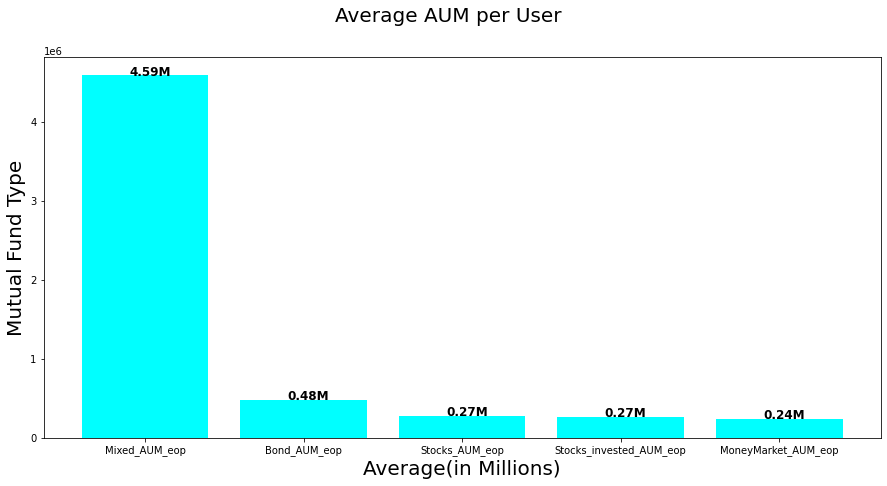

In [ ]:
fig = plt.figure(figsize=(15,7))

fig.suptitle('Average AUM per User', fontsize=20)
plt.xlabel('Average(in Millions)', fontsize=20)
plt.ylabel('Mutual Fund Type', fontsize=20)

df_AUM = df_describe[df_describe['index'].str.contains('AUM', na=False)]

df_AUM.sort_values('mean', ascending=False, inplace=True)
x = df_AUM['index']
y = df_AUM['mean']

for i, v in enumerate(y):
    vmil = round(v/1000000,2)
    plt.text(i - 0.1, v, str(vmil)+'M', fontweight='bold', fontsize=12)


plt.bar(x, y, color=('cyan'))
plt.show()

*Mixed Mutual Funds* is most choosen by our users to invest than the other, the average AUM is much higher than the other types

### What is the average monthly buy/sell per customer?

In [ ]:
df_monthly_avrg = df_mm.replace(0, np.nan).groupby("month").mean()
df_monthly_avrg

,user_age,Stocks_AUM_eop,Stocks_invested_AUM_eop,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_freq_stocks,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,MoneyMarket_profit,total_buy_moneymarket,total_sell_moneymarket,total_net_moneymarket,transaction_freq_moneymarket,Bond_AUM_eop,Bond_invested_amount_eop,Bond_profit,total_buy_bond,total_sell_bond,total_net_bond,transaction_freq_bond,Mixed_AUM_eop,Mixed_invested_amount_eop,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_freq_mixed
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08,25.47,218837.76,216511.62,2326.13,96990.52,-76530.50,-1646.83,1.28,128061.34,127857.01,204.33,61354.22,-33004.79,19361.92,1.34,384904.19,383119.92,1784.27,65953.05,-66849.54,13937.00,1.30,6053238.95,6213096.28,-159857.33,1211111.11,-1036641.40,439753.31,1.23
2021-09,25.70,294097.48,287343.18,9512.93,119020.38,-72927.89,37976.77,1.41,286223.26,285656.96,566.74,78045.95,-30265.64,31784.16,1.42,516125.19,515883.12,242.30,102837.07,-67551.08,40078.77,1.45,3866393.22,4021994.25,-155601.03,871761.90,-803089.79,227862.68,1.23


In [ ]:
df_monthly_avrg = df_monthly_avrg.T.reset_index()
df_monthly_avrg

month,index,2021-08,2021-09
0,user_age,25.47,25.70
1,Stocks_AUM_eop,218837.76,294097.48
2,Stocks_invested_AUM_eop,216511.62,287343.18
3,Stocks_profit,2326.13,9512.93
4,total_buy_stocks,96990.52,119020.38
5,total_sell_stocks,-76530.50,-72927.89
6,total_net_stocks,-1646.83,37976.77
7,transaction_freq_stocks,1.28,1.41
8,MoneyMarket_AUM_eop,128061.34,286223.26
9,MoneyMarket_invested_amount_eop,127857.01,285656.96


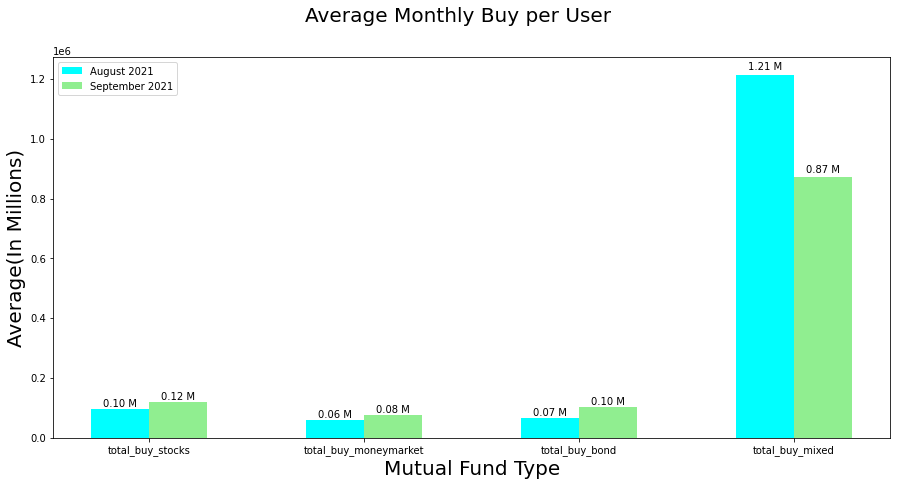

In [ ]:
df_buy = df_monthly_avrg[df_monthly_avrg['index'].str.contains('buy', na=False)]

N = len(df_buy['index'])
ind = np.arange(N)
width = 0.27

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

yvals = df_buy['2021-08']
rects1 = ax.bar(ind-0.5*width, yvals, width, color='cyan')
zvals = df_buy['2021-09']
rects2 = ax.bar(ind+0.5*width, zvals, width, color='lightgreen')

fig.suptitle('Average Monthly Buy per User', fontsize=20)
ax.set_xlabel('Mutual Fund Type', fontsize=20)
ax.set_ylabel('Average(In Millions)', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( df_buy['index'] )
ax.legend( (rects1[0], rects2[0]), ('August 2021','September 2021') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%.2f M'%float(h/1000000),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.show()

The average buy of mixed mutual funds is also higher, but in september 2021 the number of mixed bus decreased from the previous month and the other mutual funds have increased

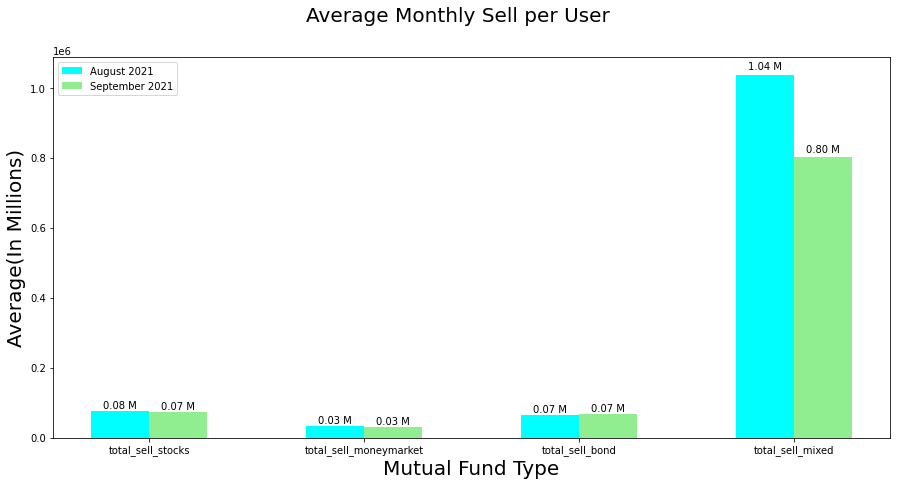

In [ ]:
df_sell = df_monthly_avrg[df_monthly_avrg['index'].str.contains('sell', na=False)]

N = len(df_sell['index'])
ind = np.arange(N)
width = 0.27

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

yvals = df_sell['2021-08'].abs()
rects1 = ax.bar(ind-0.5*width, yvals, width, color='cyan')
zvals = df_sell['2021-09'].abs()
rects2 = ax.bar(ind+0.5*width, zvals, width, color='lightgreen')

fig.suptitle('Average Monthly Sell per User', fontsize=20)
ax.set_xlabel('Mutual Fund Type', fontsize=20)
ax.set_ylabel('Average(In Millions)', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( df_sell['index'] )
ax.legend( (rects1[0], rects2[0]), ('August 2021','September 2021') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%.2f M'%float(h/1000000),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.show()

just like the buy transaction, it can be seen that in september the number of sells from mixed types has descreased from the previous month

### What is current profit average of each user?

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


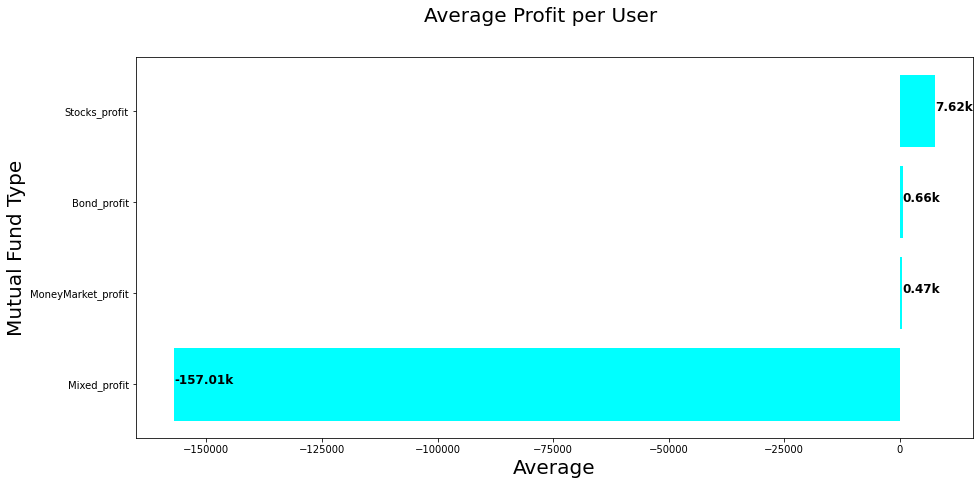

In [ ]:
fig = plt.figure(figsize=(15,7))

fig.suptitle('Average Profit per User', fontsize=20)
plt.xlabel('Average', fontsize=20)
plt.ylabel('Mutual Fund Type', fontsize=20)

df_AUM = df_describe[df_describe['index'].str.contains('profit', na=False)]
                     
df_AUM.sort_values('mean', ascending=True, inplace=True)
x = df_AUM['index']
y = df_AUM['mean']     

for i, v in enumerate(y):
    vmil = round(v/1000,2)
    plt.text(v + 5, i, str(vmil)+'k', fontweight='bold', fontsize=12)

#colors =[]
#for value in df_AUM['mean']:
#  if value < 0:
#         colors.append('lightblue') 
#  else:
#        colors.append('cyan') 

plt.barh(x, y, color= "cyan")
plt.show()    

the average profit earned from mixed mutual funf is negative or loss, this is the reasons for the reduced number of daily transactions in mixed mutual funds, meanwhile, the type of mutual fund that gets the highest profit is stocks mutual fund.

#Key Trends in the Datset


##Is There any consisten Low and High season?

create time series data

In [ ]:
df_count_trx = df_md.replace(0, np.nan).groupby("date").count()
df_count_trx

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,month
date,,,,,,,,,,,,
2021-08-04,75,75,75,75,75,75,75,0,0,0,0,75
2021-08-05,133,133,133,133,133,133,133,2,4,2,0,133
2021-08-06,218,218,218,218,218,218,218,9,14,13,0,218
2021-08-09,293,293,293,293,293,293,293,15,16,16,0,293
2021-08-10,412,412,412,412,412,412,412,20,22,21,0,412
2021-08-11,708,708,708,708,708,708,708,31,34,32,1,708
2021-08-12,708,708,708,708,708,708,708,13,13,9,0,708
2021-08-13,797,797,797,797,797,797,797,23,37,27,0,797
2021-08-16,968,968,968,968,968,968,968,32,55,57,3,968


transform column names to make easier to create line plot

In [ ]:
dfm = df_count_trx.reset_index()
dfm = dfm[['date','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']]
dfm = dfm.melt('date', var_name='cols', value_name='vals')
dfm

,date,cols,vals
0,2021-08-04,Saham_transaction_amount,0
1,2021-08-05,Saham_transaction_amount,2
2,2021-08-06,Saham_transaction_amount,9
3,2021-08-09,Saham_transaction_amount,15
4,2021-08-10,Saham_transaction_amount,20
...,...,...,...
163,2021-09-24,Campuran_transaction_amount,2
164,2021-09-27,Campuran_transaction_amount,2
165,2021-09-28,Campuran_transaction_amount,0
166,2021-09-29,Campuran_transaction_amount,2


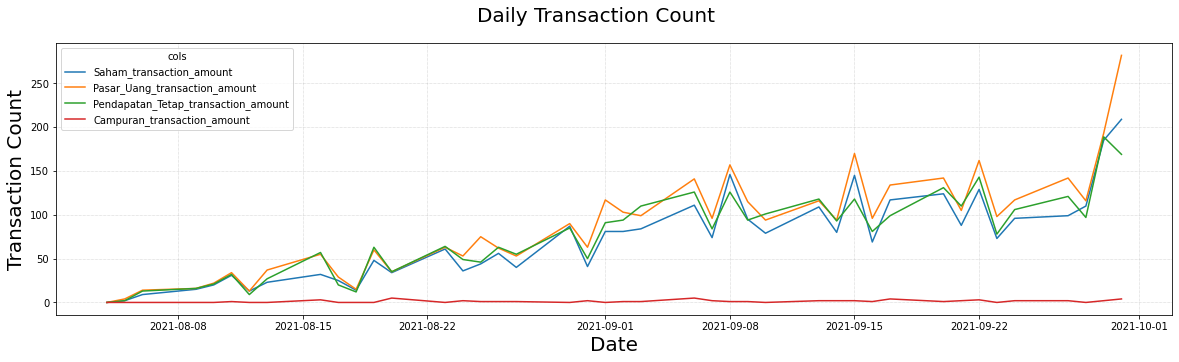

In [ ]:
fig = plt.figure(figsize=(20,5))

fig.suptitle('Daily Transaction Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Transaction Count', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.lineplot(data=dfm, x="date", y="vals", hue="cols")
plt.show()

#MILESTONE 2


## New Column Based on insight


Library for clustering

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 5.83MB/s]


In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs     
from silhoutte import silhoutte_analysis

In [ ]:
# create client segmentation using data merge daily transaction
df_test = df_mm.copy()
df_test


,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,month,Stocks_AUM_eop,Stocks_invested_AUM_eop,Stocks_profit,total_buy_stocks,total_sell_stocks,total_net_stocks,transaction_freq_stocks,MoneyMarket_AUM_eop,MoneyMarket_invested_amount_eop,MoneyMarket_profit,total_buy_moneymarket,total_sell_moneymarket,total_net_moneymarket,transaction_freq_moneymarket,Bond_AUM_eop,Bond_invested_amount_eop,Bond_profit,total_buy_bond,total_sell_bond,total_net_bond,transaction_freq_bond,Mixed_AUM_eop,Mixed_invested_amount_eop,Mixed_profit,total_buy_mixed,total_sell_mixed,total_net_mixed,transaction_freq_mixed
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09,194956.00,190000.00,4956.00,0.00,0.00,0.00,0,40063.00,40000.00,63.00,0.00,0.00,0.00,0,262853.00,270000.00,-7147.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
1,2182692,Male,17,Pelajar,< 10 Juta,used referral,Undian,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,140294.00,140000.00,294.00,0.00,0.00,0.00,0,74767.00,75000.00,-233.00,25000.00,0.00,25000.00,1,0.00,0.00,0.00,0.00,0.00,0.00,0
2,3426536,Female,17,Pelajar,< 10 Juta,not used referral,Undian,2021-09,51857.00,50000.00,1857.00,0.00,0.00,0.00,0,10002.00,10000.00,2.00,0.00,0.00,0.00,0,39955.00,40000.00,-45.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,605271.00,604590.00,681.00,504590.00,0.00,504590.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0
4,3750521,Male,17,Pelajar,< 10 Juta,not used referral,Hasil Investasi,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,10008.00,10000.00,8.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,3736233,Male,46,Swasta,< 10 Juta,not used referral,Gaji,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0,201147.00,200000.00,1147.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8934,2478889,Female,46,Swasta,< 10 Juta,not used referral,Gaji,2021-08,30486.00,30000.00,486.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,70488.00,70000.00,488.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8935,2478889,Female,46,Swasta,< 10 Juta,not used referral,Gaji,2021-09,31583.00,30000.00,1583.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,70175.00,70000.00,175.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0
8936,3802513,Female,46,IRT,< 10 Juta,not used referral,Gaji,2021-08,0.00,0.00,0.00,0.00,0.00,0.00,0,10012.00,10000.00,12.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
df_test2= df_test.copy()
# Make filter of unused columns
lst_unused_column = ['referral_code_used', 'user_income_source','Stocks_AUM_eop','Stocks_invested_AUM_eop','Stocks_profit','total_buy_stocks','total_sell_stocks', 'total_net_stocks','transaction_freq_stocks', 
                     'MoneyMarket_AUM_eop','MoneyMarket_invested_amount_eop','MoneyMarket_profit','total_buy_moneymarket','total_sell_moneymarket','total_net_moneymarket','transaction_freq_moneymarket', 
                     'Bond_AUM_eop','Bond_invested_amount_eop','Bond_profit','total_buy_bond','total_sell_bond','total_net_bond','transaction_freq_bond',
                     'Mixed_invested_amount_eop','total_buy_mixed','total_sell_mixed','total_net_mixed','transaction_freq_mixed']
	
# drop unused columns
df_test2 = df_test2.drop(lst_unused_column,axis=1)

#check duplicated data
df_test2.duplicated().sum()

#drop duplicated data
df_test2.drop_duplicates(inplace=True)

# Check the data information
df_test2

,user_id,user_gender,user_age,user_occupation,user_income_range,month,Mixed_AUM_eop,Mixed_profit
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,2021-09,0.00,0.00
1,2182692,Male,17,Pelajar,< 10 Juta,2021-09,0.00,0.00
2,3426536,Female,17,Pelajar,< 10 Juta,2021-09,0.00,0.00
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,2021-09,0.00,0.00
4,3750521,Male,17,Pelajar,< 10 Juta,2021-09,0.00,0.00
...,...,...,...,...,...,...,...,...
8933,3736233,Male,46,Swasta,< 10 Juta,2021-09,0.00,0.00
8934,2478889,Female,46,Swasta,< 10 Juta,2021-08,0.00,0.00
8935,2478889,Female,46,Swasta,< 10 Juta,2021-09,0.00,0.00
8936,3802513,Female,46,IRT,< 10 Juta,2021-08,0.00,0.00


##Check data distribution

In [ ]:
df_c = df_test2[['user_id','Mixed_AUM_eop','Mixed_profit']];
df_c

,user_id,Mixed_AUM_eop,Mixed_profit
0,2431071,0.00,0.00
1,2182692,0.00,0.00
2,3426536,0.00,0.00
3,336770,0.00,0.00
4,3750521,0.00,0.00
...,...,...,...
8933,3736233,0.00,0.00
8934,2478889,0.00,0.00
8935,2478889,0.00,0.00
8936,3802513,0.00,0.00


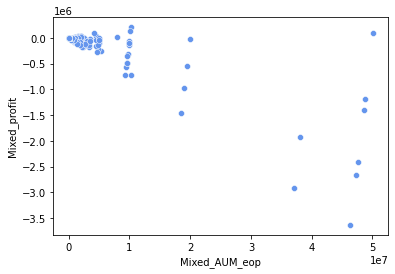

In [ ]:
sns.scatterplot (data = df_c, x='Mixed_AUM_eop', y='Mixed_profit', color = 'cornflowerblue')

In [ ]:
cluster_model = cluster.KMeans(n_clusters=2, random_state=0)
cluster_label = cluster_model.fit_predict(df_c)
df_c['cluster'] = cluster_label
df_c

cluster_model2 = cluster.KMeans(n_clusters=3, random_state=0)
cluster_label2 = cluster_model2.fit_predict(df_c)
df_c['cluster2'] = cluster_label2
df_c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,Mixed_AUM_eop,Mixed_profit,cluster,cluster2
0,2431071,0.00,0.00,0,2
1,2182692,0.00,0.00,0,2
2,3426536,0.00,0.00,0,0
3,336770,0.00,0.00,0,2
4,3750521,0.00,0.00,0,0
...,...,...,...,...,...
8933,3736233,0.00,0.00,0,0
8934,2478889,0.00,0.00,0,2
8935,2478889,0.00,0.00,0,2
8936,3802513,0.00,0.00,0,0


In [ ]:
cluster_model2 = cluster.KMeans(n_clusters=3, random_state=0)
cluster_label2 = cluster_model2.fit_predict(df_c)#fit next return predicted label
print(cluster_label2);
cluster_label22 = cluster_model2.predict(df_c)
print(cluster_label22);

cluster_model2.fit(df_c)
cluster_label21 = cluster_model2.predict(df_c)
print(cluster_label21);

[2 2 0 ... 2 0 0]
[2 2 0 ... 2 0 0]
[2 2 0 ... 2 0 0]


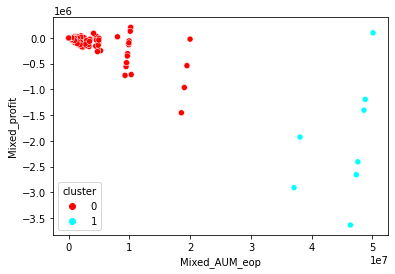

In [ ]:
colour = ['red','cyan']
#sns.scatterplot(x="Store Loyalty", y="Brand Loyalty", data=df, hue="cluster", palette=colour)
sns.scatterplot (x='Mixed_AUM_eop', y='Mixed_profit',data = df_c, hue="cluster", palette=colour)

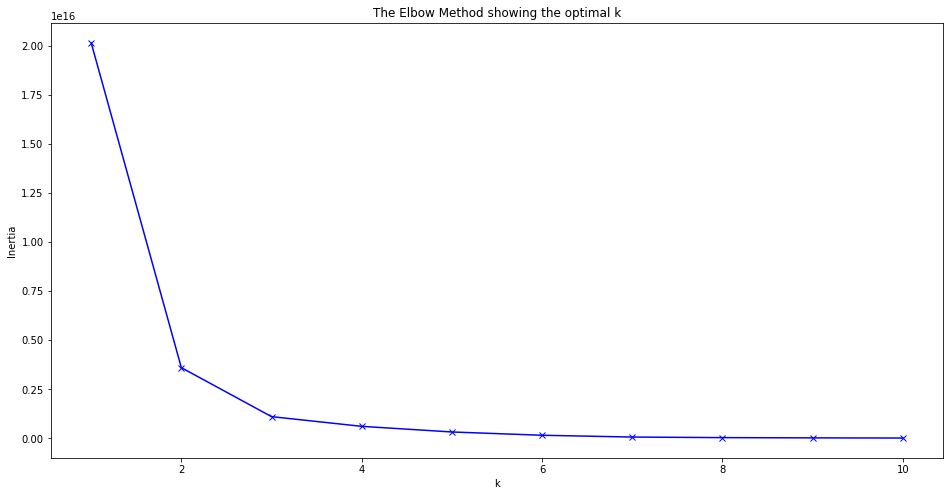

[2.014396667138397e+16, 3602909325443999.5, 1110065888167440.5, 615511390672514.5, 328866429038135.7, 161440307850133.62, 70457734501565.69, 41696240034769.7, 28869370045073.67, 20553646001086.266]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(df_c[['Mixed_AUM_eop','Mixed_profit']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Based on elbow method, we saw the drop value of distortion are in range 2-4 cluster. So we can use cluster range 2-4 for silhoutte analysis

For n_clusters = 2 The average silhouette_score is : 0.9846497491059677
For n_clusters = 3 The average silhouette_score is : 0.8541781473180529
For n_clusters = 4 The average silhouette_score is : 0.862143684361006


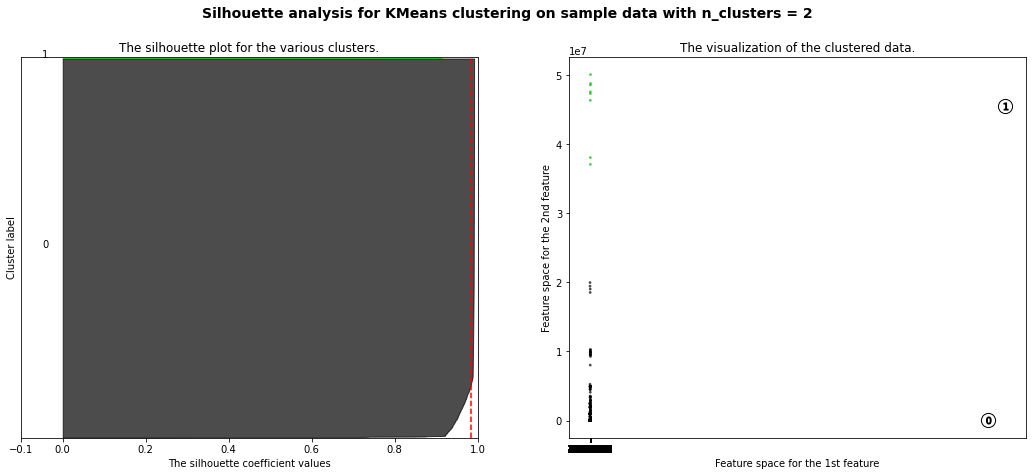

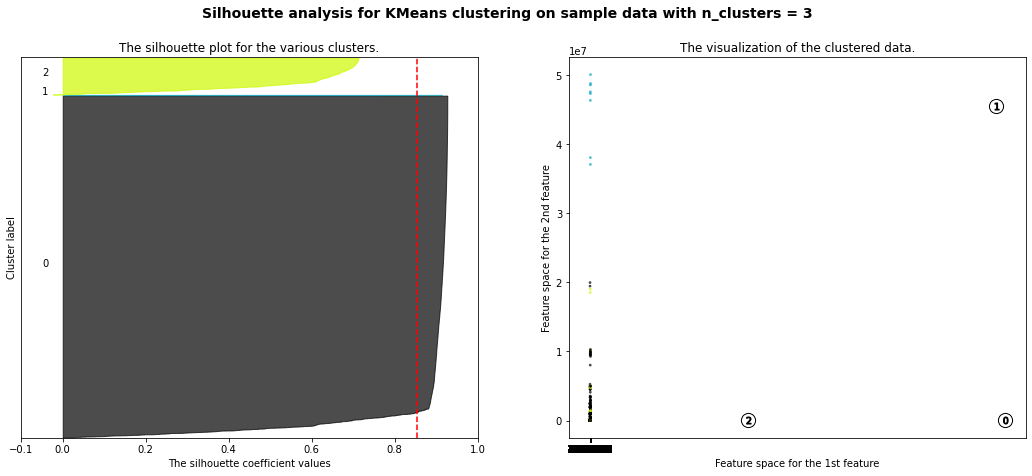

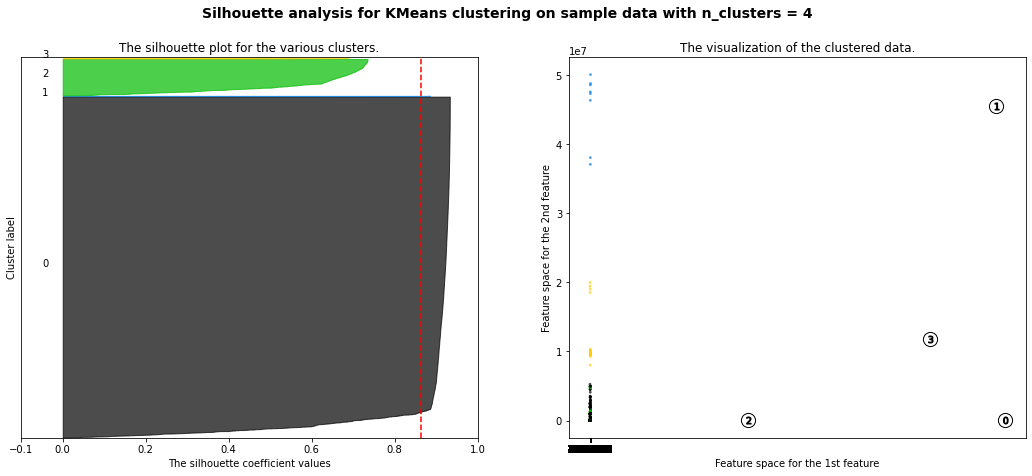

In [ ]:
silhoutte_analysis(df_c,[2, 3, 4])

check distribution

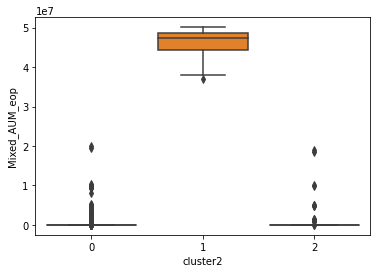

In [ ]:
# Mixed_AUM_eop
sns.boxplot (data =df_c , x ='cluster2' , y ='Mixed_AUM_eop')

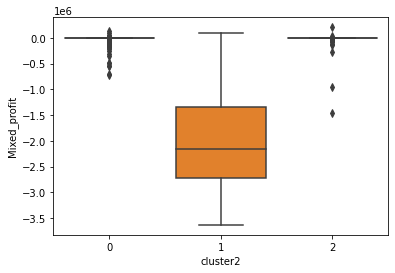

In [ ]:
# transaction frequency
sns.boxplot (data =df_c , x ='cluster2' , y ='Mixed_profit')

In [ ]:
# Merge to Main Data
df_join = df_test2.merge(df_c[['user_id','cluster2']], how='inner', on='user_id')
df_join

,user_id,user_gender,user_age,user_occupation,user_income_range,month,Mixed_AUM_eop,Mixed_profit,cluster2
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,2021-09,0.00,0.00,2
1,2182692,Male,17,Pelajar,< 10 Juta,2021-09,0.00,0.00,2
2,3426536,Female,17,Pelajar,< 10 Juta,2021-09,0.00,0.00,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,2021-09,0.00,0.00,2
4,3750521,Male,17,Pelajar,< 10 Juta,2021-09,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
13421,2478889,Female,46,Swasta,< 10 Juta,2021-09,0.00,0.00,2
13422,3802513,Female,46,IRT,< 10 Juta,2021-08,0.00,0.00,0
13423,3802513,Female,46,IRT,< 10 Juta,2021-08,0.00,0.00,0
13424,3802513,Female,46,IRT,< 10 Juta,2021-09,0.00,0.00,0


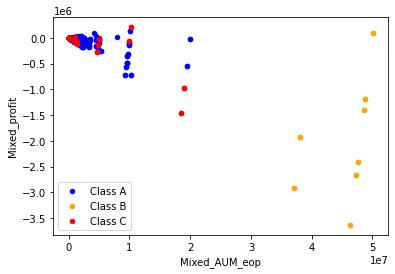

In [ ]:
# Make scatter plot based on cluster then mix it in one figure
ax = df_join[df_join['cluster2'] == 0].plot.scatter(x='Mixed_AUM_eop', y='Mixed_profit', c='blue', label='Class A')
ax = df_join[df_join['cluster2'] == 1].plot.scatter(x='Mixed_AUM_eop', y='Mixed_profit', c='orange', label='Class B', ax=ax)
ax = df_join[df_join['cluster2'] == 2].plot.scatter(x='Mixed_AUM_eop', y='Mixed_profit', c='red', label='Class C', ax=ax)
ax

### DESCRIPTIVE STATISTIC


In [ ]:
desc_segmnt = df_join.groupby('cluster2')['Mixed_AUM_eop','Mixed_profit'].agg(['count','mean','min','max','median'])
desc_segmnt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Mixed_AUM_eop                                                  \
                 count        mean         min         max      median   
cluster2                                                                 
0                12076    50717.65        0.00 19977936.00        0.00   
1                   16 45496727.88 37092607.00 50099642.00 47468424.50   
2                 1334   121597.00        0.00 19037505.00        0.00   

         Mixed_profit                                                
                count        mean         min       max      median  
cluster2                                                             
0               12076    -1374.00  -726848.00 131347.00        0.00  
1                  16 -2003272.12 -3634241.00  99642.00 -2165613.50  
2                1334    -4452.48 -1453697.00 206945.00        0.00

### Interpreting Cluster

#### Segementation Data

In [ ]:
df_join

,user_id,user_gender,user_age,user_occupation,user_income_range,month,Mixed_AUM_eop,Mixed_profit,cluster2
0,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,2021-09,0.00,0.00,2
1,2182692,Male,17,Pelajar,< 10 Juta,2021-09,0.00,0.00,2
2,3426536,Female,17,Pelajar,< 10 Juta,2021-09,0.00,0.00,0
3,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,2021-09,0.00,0.00,2
4,3750521,Male,17,Pelajar,< 10 Juta,2021-09,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
13421,2478889,Female,46,Swasta,< 10 Juta,2021-09,0.00,0.00,2
13422,3802513,Female,46,IRT,< 10 Juta,2021-08,0.00,0.00,0
13423,3802513,Female,46,IRT,< 10 Juta,2021-08,0.00,0.00,0
13424,3802513,Female,46,IRT,< 10 Juta,2021-09,0.00,0.00,0


Total user based on income range

total AUM per cluster

In [ ]:
df_join.groupby(['cluster2']).sum()['Mixed_AUM_eop'].reset_index()

,cluster2,Mixed_AUM_eop
0,0,612466389.00
1,1,727947646.00
2,2,162210394.00



- Cluster 0 =  612.5 M
- Cluster 1 =  728 M
- Cluster 2 =  162 M

total Profit per cluster

In [ ]:
df_join.groupby(['cluster2']).sum()['Mixed_profit'].reset_index()

,cluster2,Mixed_profit
0,0,-16592433.00
1,1,-32052354.00
2,2,-5939606.00



- Cluster 0 =  -16.6 M
- Cluster 1 =  -32 M
- Cluster 2 =  -5.9 M

Number user based on gender

In [ ]:
df_join.groupby(['cluster2','user_gender']).nunique()['user_id'].reset_index()

,cluster2,user_gender,user_id
0,0,Female,2181
1,0,Male,3877
2,1,Female,3
3,1,Male,1
4,2,Female,233
5,2,Male,399


- Cluster 0 =  64 % Male
- Cluster 1 =  90% Female
- Cluster 2 =  63 % Male


average profit Mixed AUM based on gender


In [ ]:
df_join.groupby(['cluster2','user_gender']).mean()['Mixed_profit'].reset_index()

,cluster2,user_gender,Mixed_profit
0,0,Female,-1762.85
1,0,Male,-1138.83
2,1,Female,-1994372.83
3,1,Male,-2029970.00
4,2,Female,-281.31
5,2,Male,-6929.27


**INSIGHT**
- Cluster 0 = Female -1.8 K
- Cluster 1 = Male -20.3 M
- Cluster 2 = Male -6.9 K

Average profit Mixed AUM based on user income

In [ ]:
df_join.groupby(['cluster2','user_income_range']).mean()['Mixed_profit'].reset_index()

,cluster2,user_income_range,Mixed_profit
0,0,< 10 Juta,-428.37
1,0,> Rp 100 Juta,-8758.05
2,0,> Rp 50 Juta - 100 Juta,-2214.08
3,0,Rp 10 Juta - 50 Juta,-1209.49
4,1,> Rp 100 Juta,-2416191.50
5,1,> Rp 50 Juta - 100 Juta,-1865632.33
6,2,< 10 Juta,-105.52
7,2,> Rp 100 Juta,-6040.47
8,2,> Rp 50 Juta - 100 Juta,-4915.81
9,2,Rp 10 Juta - 50 Juta,-14649.17


Total profit Mixed AUM based on user income

In [ ]:
df_join.groupby(['cluster2','user_income_range']).sum()['Mixed_profit'].reset_index()

,cluster2,user_income_range,Mixed_profit
0,0,< 10 Juta,-2470009.00
1,0,> Rp 100 Juta,-5535088.00
2,0,> Rp 50 Juta - 100 Juta,-3790498.00
3,0,Rp 10 Juta - 50 Juta,-4796838.00
4,1,> Rp 100 Juta,-9664766.00
5,1,> Rp 50 Juta - 100 Juta,-22387588.00
6,2,< 10 Juta,-83151.00
7,2,> Rp 100 Juta,-362428.00
8,2,> Rp 50 Juta - 100 Juta,-820941.00
9,2,Rp 10 Juta - 50 Juta,-4673086.00
